In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.stats import norm
from utils import simulateSigma

height = 64
width = 64
image0 = np.zeros((height, width), dtype=np.uint8) 

# Error_std-Delta

================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============
================empty lines==============


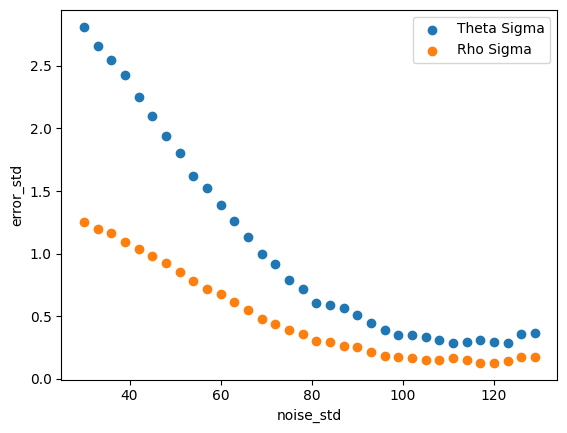

In [12]:
thetaSigmaList = []
rhoSigmaList = []
noise = 20
low = 70
start = 30
end = 130
step = 3
deltaList = range(start, end, step)

# 检查当前文件夹中是否存在Results路径
if not os.path.exists("Results"):
    os.makedirs("Results")

for delta in deltaList:
    # print(f"===========delta {delta}==========")
    thetaSigma, rhoSigma = simulateSigma(image0, noise, low, low + delta, iterNum=10000)
    thetaSigmaList.append(thetaSigma)
    rhoSigmaList.append(rhoSigma)

# 将三个list转换为NumPy数组
deltaList = np.array(deltaList)
thetaSigmaList = np.array(thetaSigmaList)
rhoSigmaList = np.array(rhoSigmaList)

# 保存为.npy文件
np.save(f'Results/Delta_start{start}_end{end}_noise{noise}_low{low}.npy', [deltaList, thetaSigmaList, rhoSigmaList])

plt.figure()
plt.scatter(deltaList, thetaSigmaList, label='Theta Sigma')
plt.scatter(deltaList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("noise_std")
plt.ylabel("error_std")
plt.legend()
plt.savefig(f"Results/Delta_start{start}_end{end}_noise{noise}_low{low}.png")

# Delta_I load data and draw curve

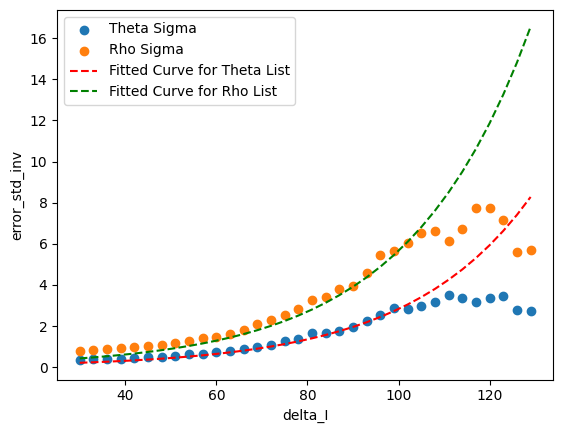

In [17]:
deltaList, thetaSigmaList, rhoSigmaList = np.load("Results/Delta_start30_end130_noise20_low70.npy")
thetaSigmaList = 1 / thetaSigmaList
rhoSigmaList = 1 / rhoSigmaList
def func(x, a, b, c):
    return a + b * np.exp(c * x)

plt.figure()
plt.scatter(deltaList, thetaSigmaList, label='Theta Sigma')
plt.scatter(deltaList, rhoSigmaList, label='Rho Sigma')
plt.xlabel("delta_I")
plt.ylabel("error_std_inv")
plt.plot(deltaList, func(deltaList, 0, 0.07, 0.037), 'r--', label='Fitted Curve for Theta List')
plt.plot(deltaList, func(deltaList, 0, 0.14, 0.037), 'g--', label='Fitted Curve for Rho List')
plt.legend()